![copyright](logo.png "Copyright (c) 2017, Bas Hoonhout")

<div style="text-align: right"> Copyright (c) 2023, Aeolis developer team </div>




In [1]:
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
from matplotlib import animation
import knmi
import pandas
from windrose import WindroseAxes, plot_windrose
%matplotlib notebook

In [188]:
# generate grids
[y_grid,x_grid] = np.mgrid[0:10,0:100]
# save grid to files
np.savetxt('x_grid.txt',x_grid,fmt='%.d')
np.savetxt('y_grid.txt',y_grid,fmt='%.d')
np.savetxt('z_grid.txt',np.zeros(np.shape(x_grid)),fmt='%.d')


supply = np.zeros(np.shape(x_grid)) 
#supply[:,0:20] = 0.00006
supply[:,0:21] = 1e-8
np.savetxt('supply_file1min8.txt',supply,fmt='%.10f')

In [54]:
# read wind time series

meteo1, legend = knmi.read_uurgeg('uurgeg_235_2001-2010.txt')
meteo2, legend = knmi.read_uurgeg('uurgeg_235_2011-2020.txt')
# ix = (meteo['DD'] > 360.) | (meteo['FH'] >= 900)
# meteo = meteo['DD'][ix]=0

meteo = pandas.concat((meteo1,meteo2))
#meteo = meteo1



m = meteo.filter(['FH','DD'])

m = m.rename(columns={"FH": "speed", "DD": "direction"})
ix = (m['direction'] > 360.) | (m['speed'] >= 900)
m['direction'][ix]=0
m['speed'][ix]=0

alpha = 0.
#m = meteo[t0:t1].filter(['FH','DD'])
t = np.asarray([[x.total_seconds() for x in m.index - m.index[0]]]).T

m['speed'] = m['speed'].divide(10.)
m['direction'] = m['direction'].subtract(alpha)



<IPython.core.display.Javascript object>


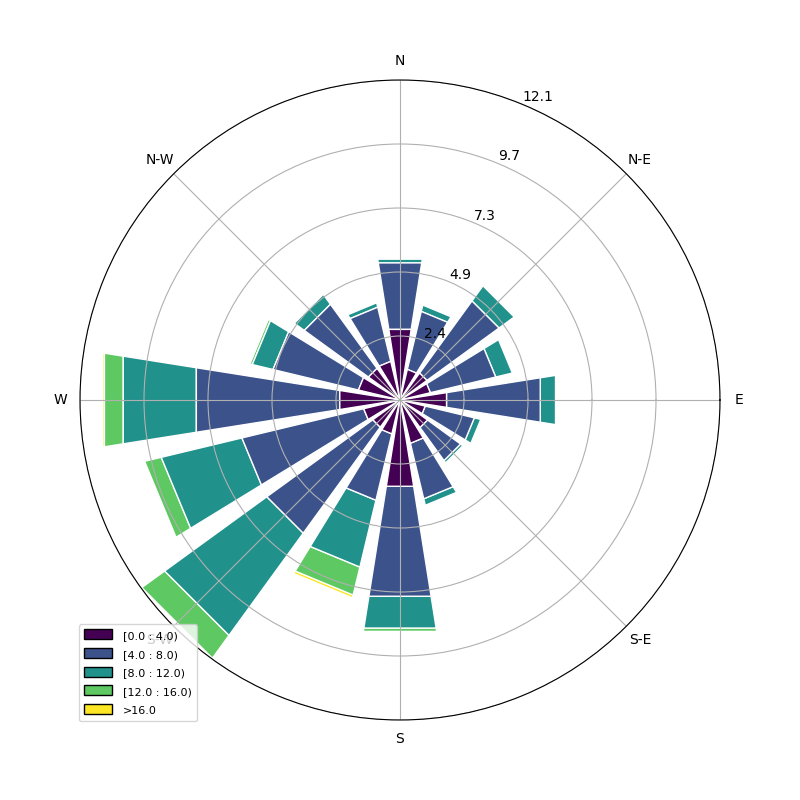

<WindroseAxes: >

In [62]:
# read wind time series
# January 1st 2006 - December 31st 2016

meteo1, legend = knmi.read_uurgeg('uurgeg_235_2001-2010.txt')
meteo2, legend = knmi.read_uurgeg('uurgeg_235_2011-2020.txt')
# ix = (meteo['DD'] > 360.) | (meteo['FH'] >= 900)
# meteo = meteo['DD'][ix]=0

meteo = pandas.concat((meteo1,meteo2))
#meteo = meteo1

#here we filter for timeseries.
m = meteo.loc['2006-01-01':'2016-12-31'].filter(['FH','DD'])

m = m.rename(columns={"FH": "speed", "DD": "direction"})
ix = (m['direction'] > 360.) | (m['speed'] >= 900)
m['direction'][ix]=0
m['speed'][ix]=0

alpha = 0.
#m = meteo[t0:t1].filter(['FH','DD'])
t = np.asarray([[x.total_seconds() for x in m.index - m.index[0]]]).T

m['speed'] = m['speed'].divide(10.)
m['direction'] = m['direction'].subtract(alpha)

plot_windrose(m, kind='bar', normed=True, opening=0.8, edgecolor='white',bins=np.arange(0, 20, 4))



<IPython.core.display.Javascript object>


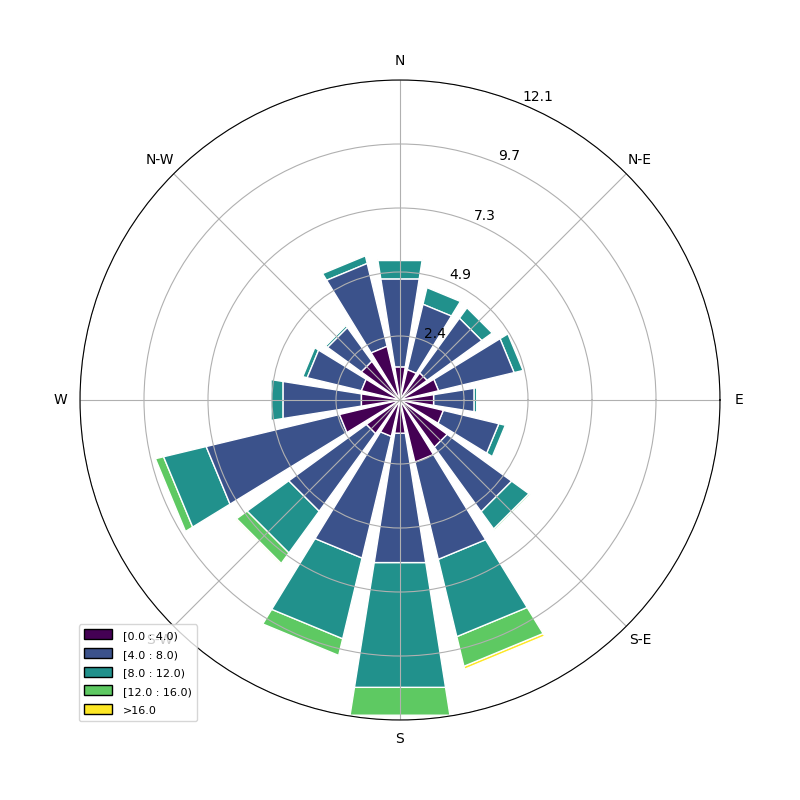

<WindroseAxes: >

In [63]:
# rotate shrink and save
alpha = 42.

m['direction']=(m['direction']-alpha) % 360


# m['speed'][m['direction']<180]=0
# m['direction'][m['direction']<180]=270

# m['speed'][m['direction']>=360]=0
# m['direction'][m['direction']>=360]=270

plot_windrose(m, kind='bar', normed=True, opening=0.8, edgecolor='white',bins=np.arange(0, 20, 4))




<IPython.core.display.Javascript object>


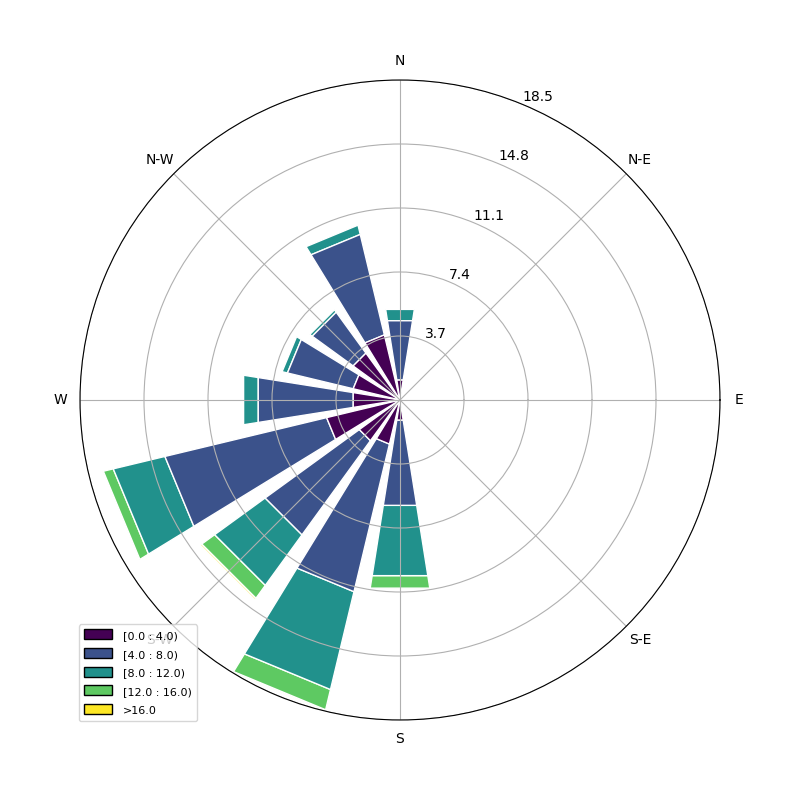

<WindroseAxes: >

In [64]:
#shrink and save
m['speed'][m['direction']<180]=0
m['direction'][m['direction']<180]=270

m['speed'][m['direction']>=360]=0
m['direction'][m['direction']>=360]=270

plot_windrose(m, kind='bar', normed=True, opening=0.8, edgecolor='white',bins=np.arange(0, 20, 4))



In [65]:
np.savetxt('wind_2006_2016_42.txt', np.concatenate((t, m.values), axis=1))

<IPython.core.display.Javascript object>


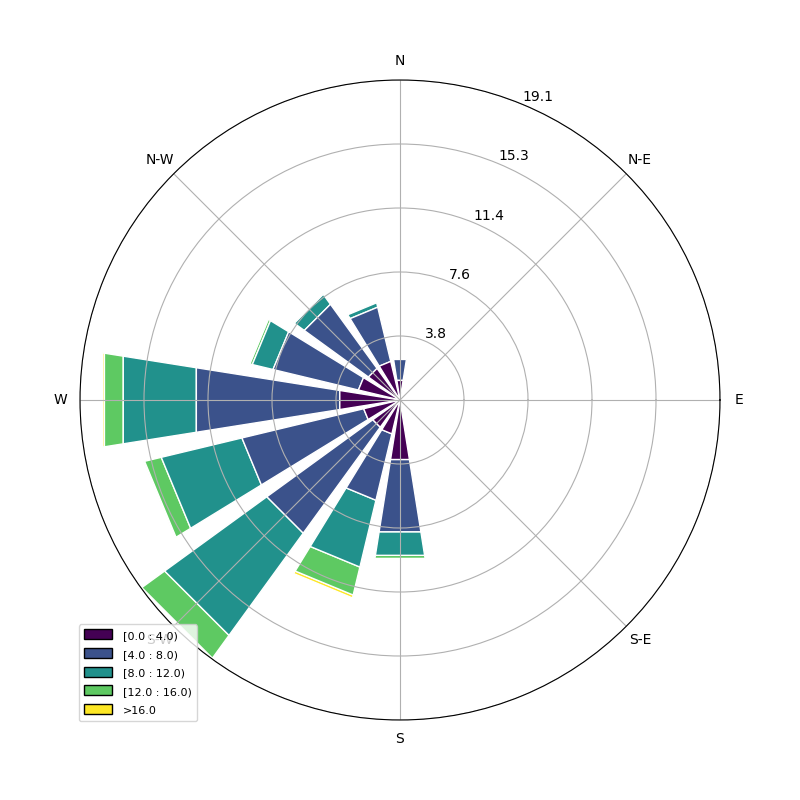

<WindroseAxes: >

In [40]:
plot_windrose(m, kind='bar', normed=True, opening=0.8, edgecolor='white',bins=np.arange(0, 20, 4))


<IPython.core.display.Javascript object>


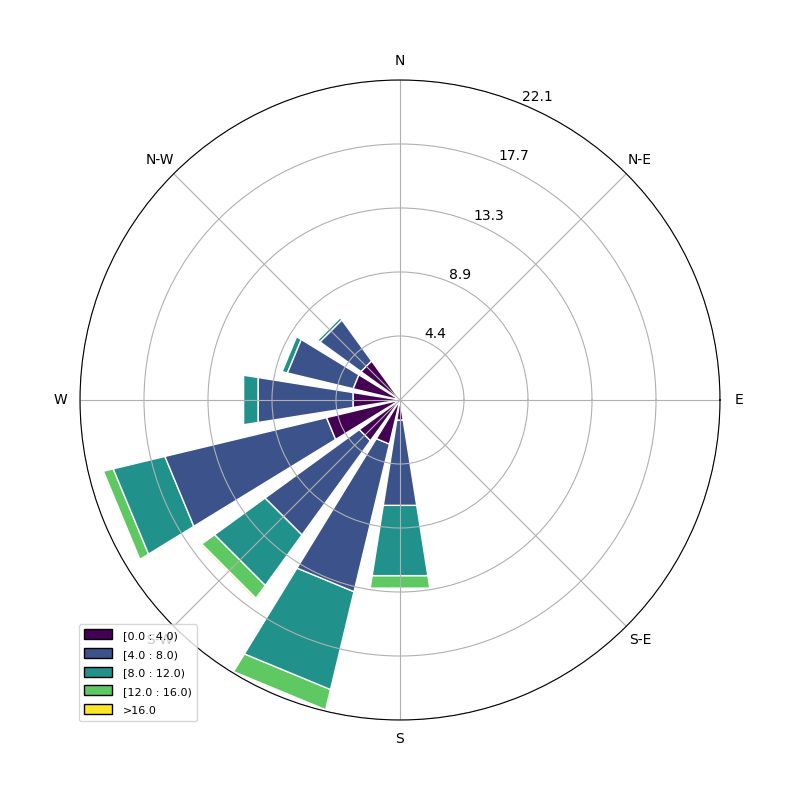

<WindroseAxes: >

In [44]:
#fig, ax = plt.subplots(3,1,figsize=(10,6))

# m.plot(y='direction',ax=ax[0])
# m.plot(y='speed',ax=ax[1])
plot_windrose(m, kind='bar', normed=True, opening=0.8, edgecolor='white',bins=np.arange(0, 20, 4))



<IPython.core.display.Javascript object>


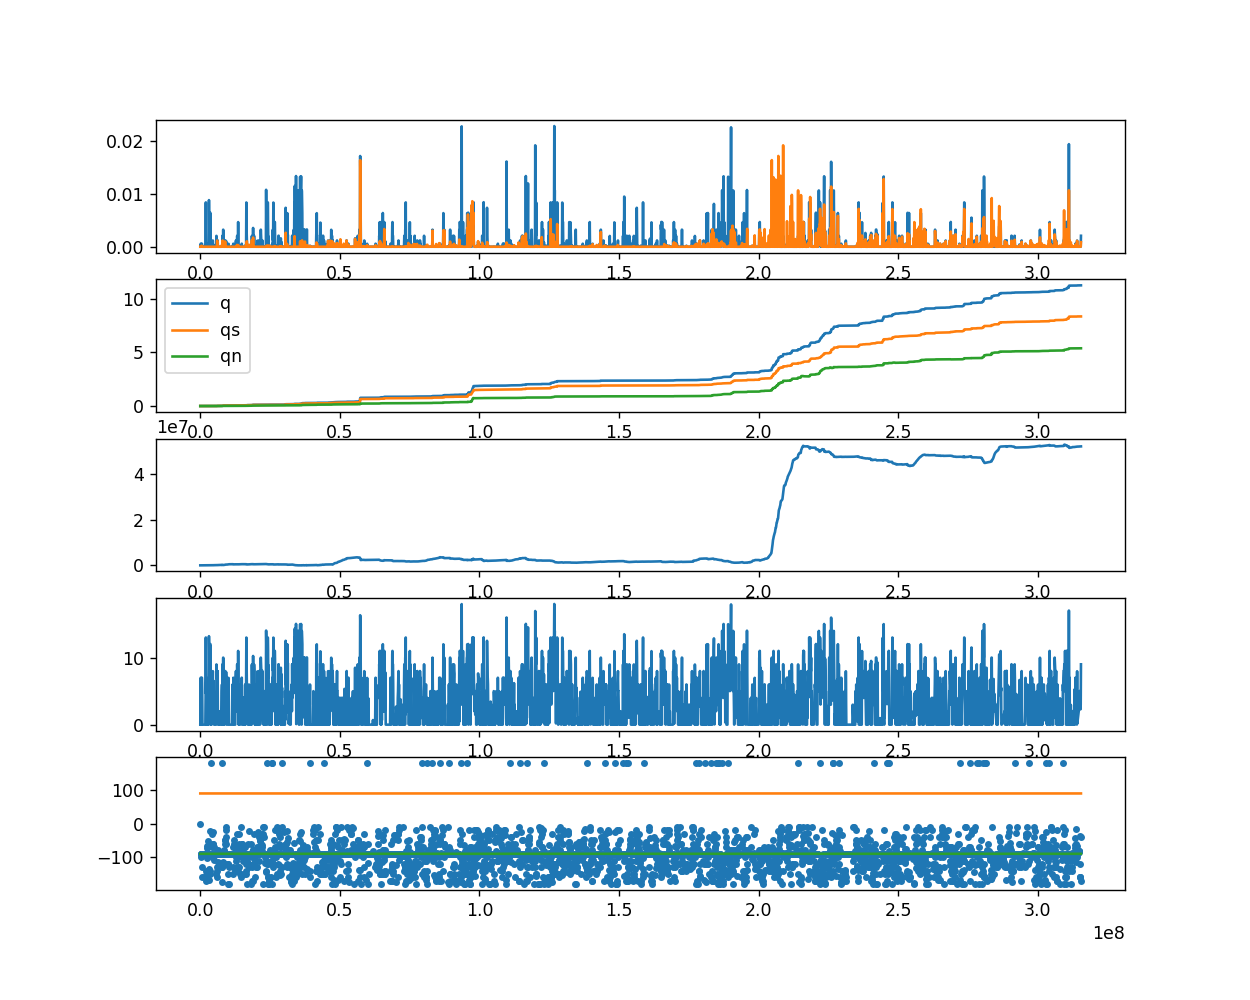

0.26684823632240295

In [15]:
ncfile = 'Run4.nc'
with netCDF4.Dataset(ncfile, 'r') as ds:
    
    # get spatial dimensions and bed levels
    t = ds.variables['time'][:]
    x = ds.variables['x'][:,:]
    y = ds.variables['y'][:,:]
    Ct = ds.variables['Ct'][...]
    Cu = ds.variables['Cu'][...]
    mass = ds.variables['mass'][...]
    #pickup = ds.variables['pickup'][...]
    #uth = ds.variables['uth'][...]
    uw= ds.variables['uw'][...]
    udir= ds.variables['udir'][...]
   # q_sum= ds.variables['q_sum'][...]
   # q_avg= ds.variables['q_avg'][...]
    q= ds.variables['q'][...]
    #qs_sum= ds.variables['qs_sum'][...]
    #q_avg= ds.variables['q_avg'][...]
    qs= ds.variables['qs'][...]
    qn= ds.variables['qn'][...]
    #zs= ds.variables['zs'][...]
    
fig, ax = plt.subplots(5,figsize=(10,8))


#lets place this one at the top.
ax[0].plot(t,Cu[:,5,95,0])
ax[0].plot(t,Ct[:,5,95,0])
#ax[0].plot([2, 2],[0, 30],'r',lw=1)
# ax0.plot([2, 2],[0, 30],'r',lw=1)
# ax0.plot([6.125, 6.125],[0, 30],'r',lw=1)
#x0.set_xlim([0, 90e3/3600])

# ax[1].plot(t,q[:,5,-5,0],label='q')
# ax[1].plot(t,qs[:,5,-5,0],label='qs')
# ax[1].plot(t,qn[:,5,-5,0],label='qn')
# ax[1].legend()

ax[1].plot(t,np.cumsum(q[:,5,-5,0]),label='q')
ax[1].plot(t,np.cumsum(qs[:,5,-5,0]),label='qs')
ax[1].plot(t,np.cumsum(qn[:,5,-5,0]),label='qn')
ax[1].legend()

ax[2].plot(t,np.squeeze(np.sum(mass,axis=(1,2))),label='mass')

ax[3].plot(t,uw[:,5,95])

ax[4].plot(t,udir[:,5,95],'.')
ax[4].plot(t,np.ones(t.shape)*90)
ax[4].plot(t,np.ones(t.shape)*-90)
#ax[2].plot(t,q_sum[:,5,95,0])
q[:,5,95,0].max()

<IPython.core.display.Javascript object>


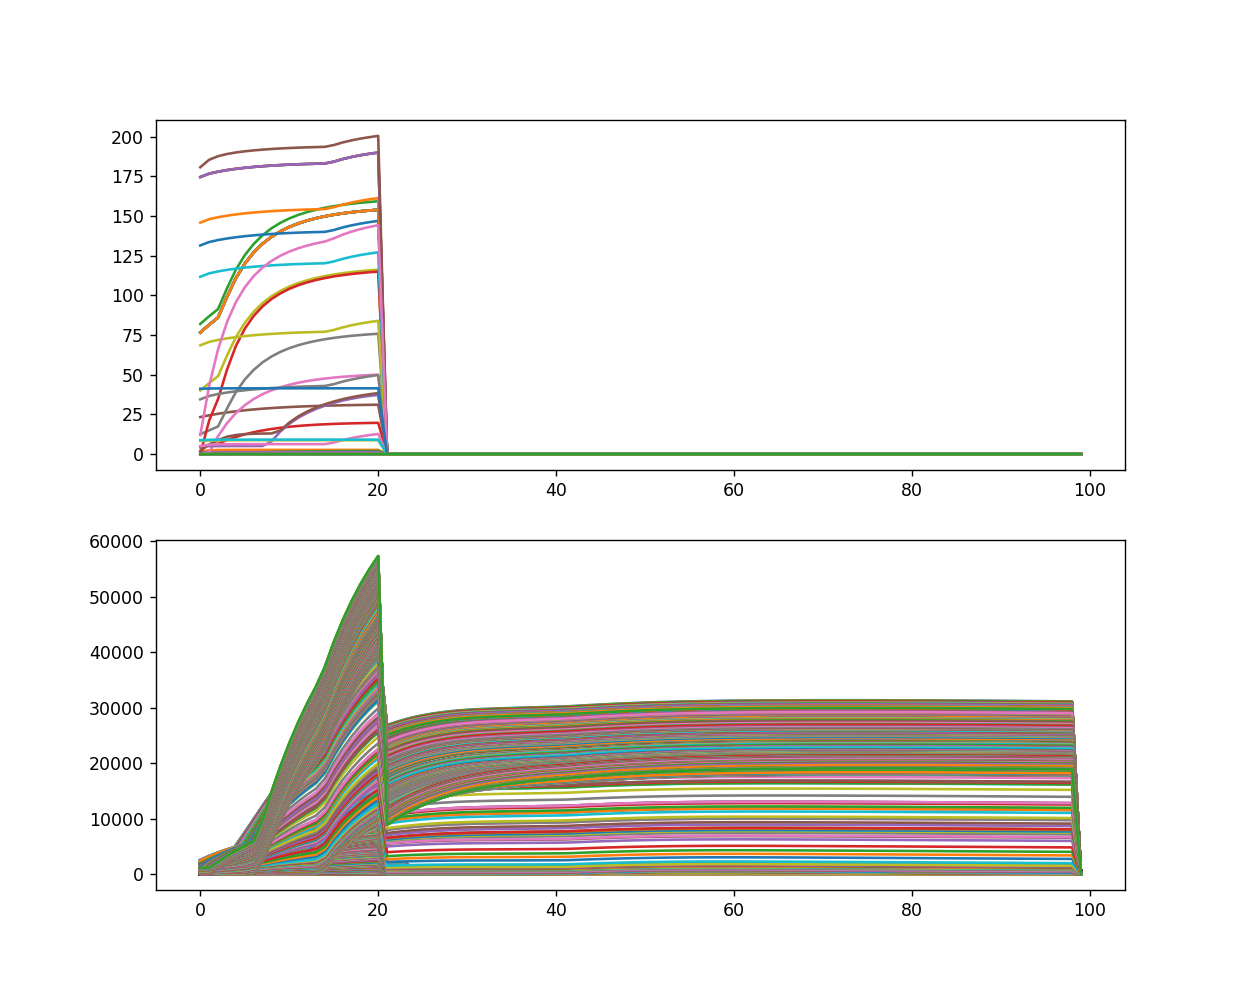

In [5]:
fig, ax = plt.subplots(2,figsize=(10,8))

ax[0].plot(np.transpose(mass[0:43,5,:,0,0]))
ax[1].plot(np.transpose(mass[:,5,:,0,0]))
bla=1

<IPython.core.display.Javascript object>


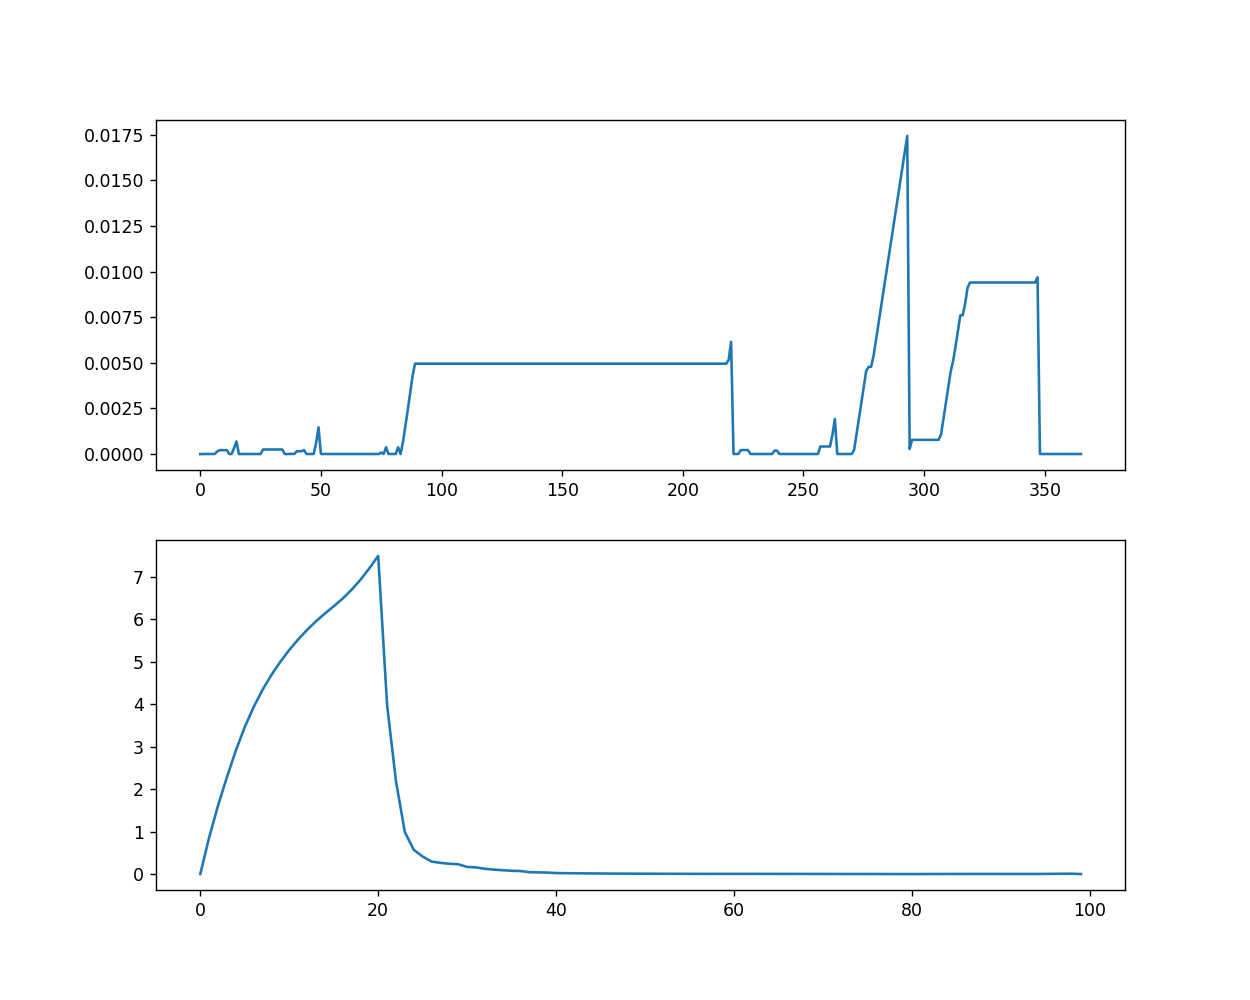

In [42]:
fig, ax = plt.subplots(2,figsize=(10,8))
ax[0].plot(mass[:,5,19,0,0])
ax[1].plot(np.sum(qs[:,5,:,0]*86400, axis=0))


In [300]:
qs[:,5,98,0].max()

2.169052095268853e-05

In [297]:
qs[:,5,98,0].sum()*86400

2.074170950342521

In [185]:
10/(365.25*24*60*60)/20

1.5844043907014474e-08

In [284]:
1e-8*20*60*60*24*365.25

6.31152

In [55]:
np.cumsum(qs_sum[:,5,95,0])[-1]/(1e-8*20)*8640/t[-1]

3.5684310270930646

In [52]:
t[-1]

3153600.0

In [66]:
np.cumsum(q_sum[:,5,95,0])[-1]-np.cumsum(qs_sum[:,5,95,0])[-1]

4.754762999520596e-08

In [49]:
print(q[:,5,95,0].sum(),qs_sum[:,5,95,0].sum(),q_avg[:,5,95,0].sum(), q_sum[:,5,95,0].sum()/q_avg[:,5,95,0].sum(),8640/60 )

5.465385497395342e-08 0.00026049546497779375 1.8093265242786544e-06 143.99999619287223 144.0


<IPython.core.display.Javascript object>


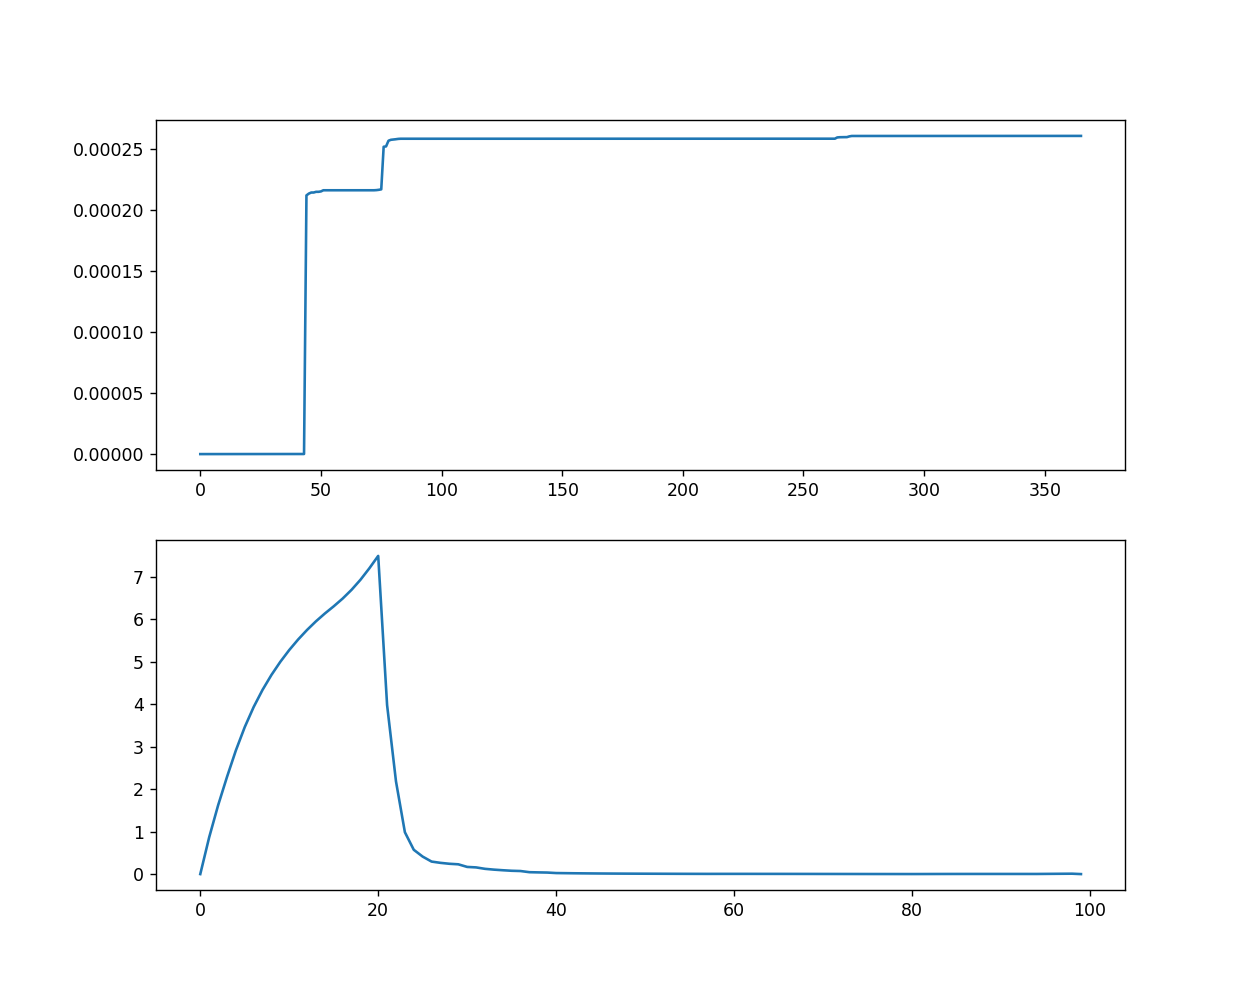

In [48]:
fig, ax = plt.subplots(2,figsize=(10,8))
ax[0].plot(np.cumsum(qs_sum[:,5,95,0]))
ax[1].plot(np.sum(qs[:,5,:,0]*86400, axis=0))


In [13]:
np.cumsum(mass,axis=2)[:,5,0,0].shape

(3653, 1)